In [2]:
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
import math
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# **Exemplo de Espirais Intercaladas**

In [3]:
t_ex = np.arange(0,np.pi*30,0.1)   
x1_ex = (t_ex/4)*np.cos(t_ex)
y1_ex = (t_ex/4)*np.sin(t_ex)
x2_ex = ((t_ex/4)+0.8)*np.cos(t_ex)
y2_ex = ((t_ex/4)+0.8)*np.sin(t_ex)

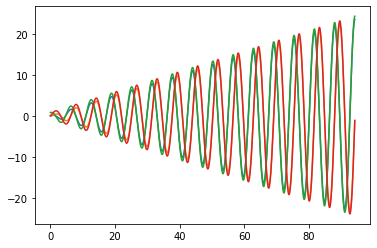

In [4]:
plt.plot(t_ex, x1_ex)
plt.plot(t_ex, y1_ex)
plt.plot(t_ex, x2_ex)
plt.plot(t_ex, y2_ex)

plt.show()

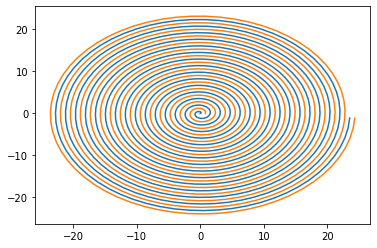

In [5]:
plt.plot(x1_ex,y1_ex,x2_ex,y2_ex)
plt.show()

# **Espirais Intercaladas da Questão**

In [6]:
t = np.arange(0,1000,20)
x1 = (t/4)*np.cos(t)
y1 = (t/4)*np.sin(t)
x2 = ((t/4)+0.8)*np.cos(t)
y2 = ((t/4)+0.8)*np.sin(t)

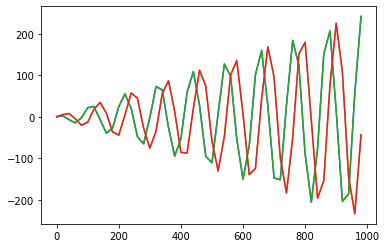

In [7]:
plt.plot(t, x1)
plt.plot(t, y1)
plt.plot(t, x2)
plt.plot(t, y2)

plt.show()

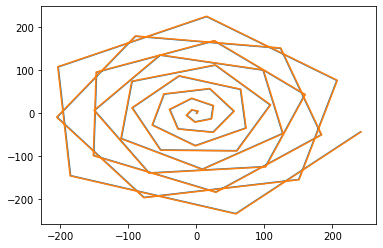

In [8]:
plt.plot(x1,y1,x2,y2)
plt.show()

# **Dataset**

In [9]:
data = pd.read_csv('dataset_espirais.csv')
data.keys()

Index(['Espirais', 'x', 'y', 'EspiralClass'], dtype='object')

In [10]:
data

,Espirais,x,y,EspiralClass
0,Espiral 1,0.000000,0.000000,0
1,Espiral 1,2.040410,4.564726,0
2,Espiral 1,-6.669381,7.451132,0
3,Espiral 1,-14.286195,-4.572159,0
4,Espiral 1,-2.207745,-19.877773,0
...,...,...,...,...
95,Espiral 2,14.958505,225.303979,1
96,Espiral 2,-204.005429,107.937135,1
97,Espiral 2,-185.729945,-145.279137,1
98,Espiral 2,58.044073,-233.699648,1


# **SVM**

In [11]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:-1].values
Y = data.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=4)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit computa a média e o desvio padrão que serão usados
# para a normalização dos dados, a partir dos dados de treinamento
scaler.fit(X_train)

# Agora transformamos de fato todos os dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[ 0.04154993, -0.4556474 ],
       [ 0.00923695, -0.1317406 ],
       [-0.74521244, -0.87870311],
       [ 0.3935331 , -0.89611207],
       [-1.16254384,  0.12601817],
       [-0.22601404, -0.77662849],
       [-0.00848789,  0.58486544],
       [ 1.0731937 , -0.48043808],
       [-1.33492085, -0.60360433],
       [ 0.35375196,  0.04798546],
       [ 0.78781232,  1.02598697],
       [-0.46758735,  0.87929759],
       [ 1.65528809, -0.51374358],
       [-0.27915967,  0.34810195],
       [ 1.04135861,  1.53942193],
       [ 0.03827217,  0.17554516],
       [ 1.08079221, -0.48327084],
       [ 0.34568305,  0.04726296],
       [-0.48659619, -0.37727977],
       [ 0.88737297,  0.19550046],
       [ 1.88803999,  0.77968973],
       [ 0.07149986,  1.13787633],
       [-0.01112692,  0.57713815],
       [-0.99292244, -2.00556316],
       [-1.32776113, -0.59978114],
       [ 1.41095534,  0.44212425],
       [ 0.37673425, -2.38206308],
       [ 0.44478521,  0.56232124],
       [-0.46988543,

In [14]:
y_train

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0])

In [15]:
X_test

array([[-0.74095722, -0.87174839],
       [ 0.03760341, -0.44850978],
       [-2.27476652,  1.10032815],
       [ 0.52300278, -0.35234793],
       [-0.69556482,  0.45689498],
       [-1.16622278,  0.75281345],
       [-0.36142802, -0.05161143],
       [-2.08971314, -1.48664938],
       [-2.2827992 , -0.09519582],
       [-2.08333262, -1.48161379],
       [ 1.31333728, -1.57257229],
       [-0.27658677,  0.07371548],
       [-0.05758774,  2.2994035 ],
       [-0.12169191, -1.32762229],
       [-0.6896498 ,  0.45131074],
       [ 0.0800117 , -1.86981818],
       [-0.86238686, -0.27975196],
       [-0.74840715,  1.37540689],
       [-1.69595542,  0.97014684],
       [-0.23230347, -0.2136128 ],
       [-1.73452939,  0.06566062],
       [-0.23140927, -0.20548957],
       [-0.91584791, -1.42545016],
       [-0.12115429, -1.33577745],
       [-1.70275269,  0.9745928 ]])

In [16]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1])

In [17]:
# Treinamento
classifier_svm = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')

classifier_svm.fit(X_train, y_train)

# Testes
Z = classifier_svm.predict(X_test)

acertos = (Z == y_test).sum()
total = len(y_test)

print("Acertou " + str(acertos) + " de " + str(total) + 
      "\n" + str(100*acertos/total) + "% de acertos")

Acertou 10 de 25
40.0% de acertos


In [18]:
cm = confusion_matrix(y_test, Z)
print(cm)

[[ 0 15]
 [ 0 10]]


# **Comitê de Máquinas**

In [19]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:-1].values
Y = data.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=4)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit computa a média e o desvio padrão que serão usados
# para a normalização dos dados, a partir dos dados de treinamento
scaler.fit(X_train)

# Agora transformamos de fato todos os dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **MLP 1**

In [21]:
mlpc = MLPClassifier(hidden_layer_sizes=(300), n_iter_no_change=15,
                     activation='relu',random_state=0)
print(mlpc)

MLPClassifier(hidden_layer_sizes=300, n_iter_no_change=15, random_state=0)


In [22]:
#Treino
mlpc.fit(X_train, y_train)
#Teste
score = mlpc.score(X_test, y_test)
resposta_MLP_1 = mlpc.predict(X_test)

print(score * 100, '%', sep='')
print((1-score) * y_test.shape[0], 'erros de classificação')

36.0%
16.0 erros de classificação


In [23]:
cm = confusion_matrix(y_test, resposta_MLP_1)
print(cm)

[[ 3 12]
 [ 4  6]]


## **MLP 2**

In [24]:
mlpc = MLPClassifier(hidden_layer_sizes=(50, 50), n_iter_no_change=15,
                     activation='relu',random_state=0)
print(mlpc)

MLPClassifier(hidden_layer_sizes=(50, 50), n_iter_no_change=15, random_state=0)


In [25]:
#Treino
mlpc.fit(X_train, y_train)
#Teste
score = mlpc.score(X_test, y_test)
resposta_MLP_2 = mlpc.predict(X_test)

print(score * 100, '%', sep='')
print((1-score) * y_test.shape[0], 'erros de classificação')

28.000000000000004%
18.0 erros de classificação


/home/pedro/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
cm = confusion_matrix(y_test, resposta_MLP_2)
print(cm)

[[ 3 12]
 [ 6  4]]


## **SVM**

In [96]:
# Treinamento
classifier_svm = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')

classifier_svm.fit(X_train, y_train)

# Testes
resposta_SVM = classifier_svm.predict(X_test)

acertos = (resposta_SVM == y_test).sum()
total = len(y_test)

print("Acertou " + str(acertos) + " de " + str(total) + 
      "\n" + str(100*acertos/total) + "% de acertos")

Acertou 10 de 25
40.0% de acertos


In [97]:
cm = confusion_matrix(y_test, resposta_SVM)
print(cm)

[[ 0 15]
 [ 0 10]]


## **Decisão Conjunta dos Classificadores**

In [138]:
answer = [0]*25
n = len(y_test)
for i in range (0, n):
    if resposta_MLP_1[i] == y_test[i]:
        answer[i] = y_test[i]
    else:
        if resposta_MLP_2[i] == y_test[i]:
            answer[i] = y_test[i]
        else:
            if resposta_SVM[i] == y_test[i]:
                answer[i] = y_test[i]
            else:
                answer[i] = resposta_SVM[i]

In [139]:
acertos = (answer == y_test).sum()
total = len(y_test)

print("Acertou " + str(acertos) + " de " + str(total) + 
      "\n" + str(100*acertos/total) + "% de acertos")

Acertou 14 de 25
56.0% de acertos


In [140]:
cm = confusion_matrix(y_test, answer)
print(cm)

[[ 4 11]
 [ 0 10]]
